# 4. Logistic Regression

## 공부 시간에 따른 자격증 시험 합격 가능성

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## 데이터 분리

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 0)

## 학습 (로지스틱 회귀 모델)

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### 6시간 공부했을 때 예측

In [6]:
lr.predict([[6]]) # 결과 1 -> 합격할 것으로 예측

array([1])

In [7]:
lr.predict_proba([[6]])  # 불합격 확률 14%, 합격 확률 86%

array([[0.14150735, 0.85849265]])

### 4시간 공부했을 때 예측

In [8]:
lr.predict([[4]]) # 결과 0 -> 불합격할 것으로 예측

array([0])

In [9]:
lr.predict_proba([[4]])  # 불합격 확률 62%, 합격 확률 38%

array([[0.6249966, 0.3750034]])

## 분류 결과 예측 (테스트 세트)

In [10]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [11]:
y_test  # 3건 정답, 1건 오답

array([1, 0, 1, 0])

In [12]:
lr.score(X_test, y_test)

0.75

## 데이터 시각화 (훈련 세트)

In [13]:
X_range = np.arange(min(X), max(X), 0.1)
p = 1/(1+np.exp(-(lr.coef_ * X_range + lr.intercept_)))  # y = mx + b

In [16]:
print(p.shape)
p = p.reshape(-1)
print(p.shape)

(1, 95)
(95,)


In [15]:
X_range.shape

(95,)

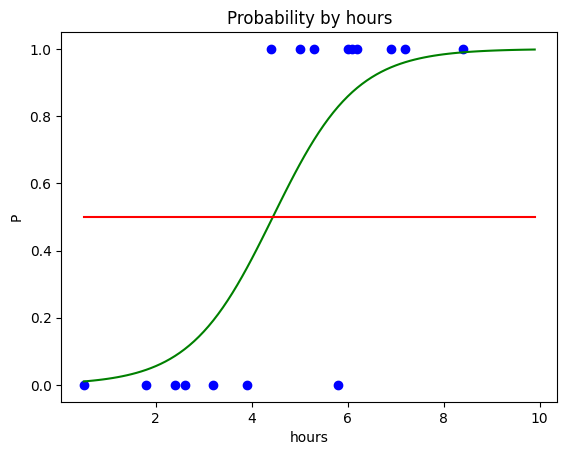

In [18]:
plt.scatter(X_train, y_train, color ='b')
plt.plot(X_range, p, color = 'g')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'r')
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

## 데이터 시각화 (테스트 세트)

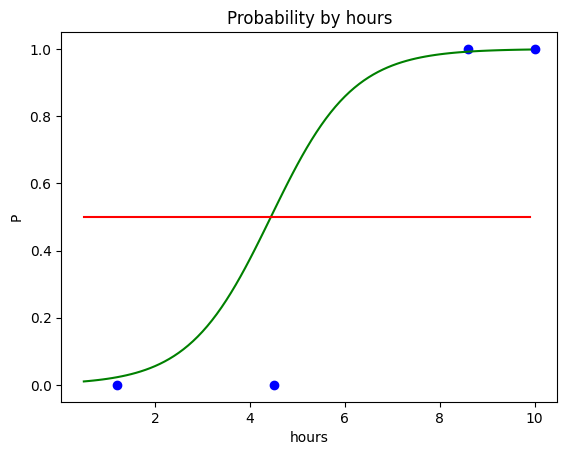

In [19]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_range, p, color = 'g')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'r')
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [20]:
lr.predict_proba([[4.5]])  # 4.5시간 공부했을 때 확률

array([[0.48310686, 0.51689314]])

## 혼동 행렬 (Confusion Matrix)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]])